# Guided Example

We will use SKlearn to implement a gradient boosted tree model.  Again we will use the European Social Survey Data, but this time we will target the categorical variable `partner`, which idetifies if someone lives with a partner or not.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Set the target to 0 & 1
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Creating train/test split
offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [32]:
# Setting up the model parameters using a **kwargs
params = {'n_estimators': 500,
         'max_depth': 2,
         'loss': 'deviance'}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

train_ = clf.predict(X_train)
test_ = clf.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, train_, margins=True)
table_test = pd.crosstab(y_test, test_, margins=True)

train_tI_errors = table_train.iloc[0,1] / table_train.iloc[2,2]
train_tII_errors = table_train.iloc[1,0] / table_train.iloc[2,2]

test_tI_errors = table_test.iloc[0,1] / table_test.iloc[2,2]
test_tII_errors = table_test.iloc[1,0] / table_test.iloc[2,2]

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

tr_er_total = round((train_tI_errors + train_tII_errors), 2)
test_er_total = round((test_tI_errors + test_tII_errors), 2)
print(tr_er_total, test_er_total)

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191
0.22 0.25


This model, on the face of it, doesn't seem overfit as it performs equally well on the test data.

Similar to random forest models, gradient boost solutions are not terribly easy to interpret.  But, because they are made up of decision trees, we can interrogate the feature importances.

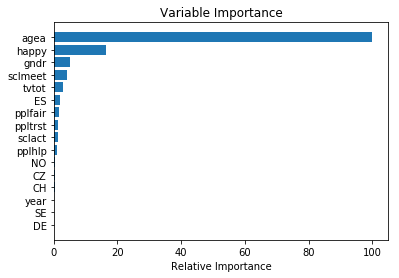

In [4]:
feat_impotance = clf.feature_importances_

feat_impotance = 100 * (feat_impotance / feat_impotance.max())
sorted_idx = np.argsort(feat_impotance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.barh(pos, feat_impotance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# \#Challenge: Improve the model

The task is to see how low we can get the error rates in the test set.

In [5]:
# Increasing the number of estimators & max depth
params = {'n_estimators': 1000,
         'max_depth': 4,
         'loss': 'deviance'}

clf2 = ensemble.GradientBoostingClassifier(**params)
clf2.fit(X_train, y_train)

train2_ = clf2.predict(X_train)
test2_ = clf2.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, train2_, margins=True)
table_test = pd.crosstab(y_test, test2_, margins=True)

train_tI_errors = table_train.iloc[0,1] / table_train.iloc[2,2]
train_tII_errors = table_train.iloc[1,0] / table_train.iloc[2,2]

test_tI_errors = table_test.iloc[0,1] / table_test.iloc[2,2]
test_tII_errors = table_test.iloc[1,0] / table_test.iloc[2,2]

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.011320240043644299
Percent Type II errors: 0.08074195308237861

Test set accuracy:
Percent Type I errors: 0.10429447852760736
Percent Type II errors: 0.18036809815950922


This model definitely overfit the training set.

In [6]:
# Decreasing max depth back to the original 2
params = {'n_estimators': 1000,
         'max_depth': 2,
         'loss': 'deviance'}

clf3 = ensemble.GradientBoostingClassifier(**params)
clf3.fit(X_train, y_train)

train3_ = clf.predict(X_train)
test3_ = clf.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, train3_, margins=True)
table_test = pd.crosstab(y_test, test3_, margins=True)

train_tI_errors = table_train.iloc[0,1] / table_train.iloc[2,2]
train_tII_errors = table_train.iloc[1,0] / table_train.iloc[2,2]

test_tI_errors = table_test.iloc[0,1] / table_test.iloc[2,2]
test_tII_errors = table_test.iloc[1,0] / table_test.iloc[2,2]

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


This is the same result as the initial model

In [7]:
# Trying a subsample of 0.5 with the original parameters
params = {'n_estimators': 500,
          'max_depth': 2,
          'subsample': 0.5,
          'loss': 'deviance'}

clf4 = ensemble.GradientBoostingClassifier(**params)
clf4.fit(X_train, y_train)

train4_ = clf4.predict(X_train)
test4_ = clf4.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, train4_, margins=True)
table_test = pd.crosstab(y_test, test4_, margins=True)

train_tI_errors = table_train.iloc[0,1] / table_train.iloc[2,2]
train_tII_errors = table_train.iloc[1,0] / table_train.iloc[2,2]

test_tI_errors = table_test.iloc[0,1] / table_test.iloc[2,2]
test_tII_errors = table_test.iloc[1,0] / table_test.iloc[2,2]

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04964539007092199
Percent Type II errors: 0.1692580469176214

Test set accuracy:
Percent Type I errors: 0.07607361963190185
Percent Type II errors: 0.17791411042944785


Did much better about not overfitting, but no apprecible change in the model results.

In [27]:
# Keeping the subsample and increasing max depth to 3
params = {'n_estimators': 500,
          'max_depth': 2,
          'subsample': .4,
          'loss': 'deviance',
          'max_features': 'auto',
          'tol': 1e-5}

clf5 = ensemble.GradientBoostingClassifier(**params)
clf5.fit(X_train, y_train)

train5_ = clf5.predict(X_train)
test5_ = clf5.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, train5_, margins=True)
table_test = pd.crosstab(y_test, test5_, margins=True)

train_tI_errors = table_train.iloc[0,1] / table_train.iloc[2,2]
train_tII_errors = table_train.iloc[1,0] / table_train.iloc[2,2]

test_tI_errors = table_test.iloc[0,1] / table_test.iloc[2,2]
test_tII_errors = table_test.iloc[1,0] / table_test.iloc[2,2]

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.1718494271685761

Test set accuracy:
Percent Type I errors: 0.06748466257668712
Percent Type II errors: 0.18404907975460122


In [31]:
# Parameter ranges for the loop
n_est = [200, 400, 600, 800, 1000]
max_d = [1,2,3,4,5]
subsamp = [.1, .25, .5, .75, .9, 1]
max_feat = [None, 'sqrt']
tol_stop = [1e-2, 1e-3, 1e-4, 1e-5]

print('n_est\tmax_d\tsubsamp\tloss\tmax_feat\ttol\ttr_er\ttest_er')

for n in n_est:
    for md in max_d:
        for ss in subsamp:
            for mf in max_feat:
                for t in tol_stop:
                    params = {'n_estimators': n,
                              'max_depth': md,
                              'subsample': ss,
                              'loss': 'deviance',
                              'max_features': mf,
                              'tol': t}

                    clf_loop = ensemble.GradientBoostingClassifier(**params)
                    clf_loop.fit(X_train, y_train)

                    trainloop_ = clf_loop.predict(X_train)
                    testloop_ = clf_loop.predict(X_test)

                    # Accuracy tables
                    table_train = pd.crosstab(y_train, trainloop_, margins=True)
                    table_test = pd.crosstab(y_test, testloop_, margins=True)

                    train_tI_errors = table_train.iloc[0,1] / table_train.iloc[2,2]
                    train_tII_errors = table_train.iloc[1,0] / table_train.iloc[2,2]
                    tr_er_total = round((train_tI_errors + train_tII_errors), 2)
                    
                    test_tI_errors = table_test.iloc[0,1] / table_test.iloc[2,2]
                    test_tII_errors = table_test.iloc[1,0] / table_test.iloc[2,2]
                    t_er_total = round((test_tI_errors + test_tII_errors), 2)
                    
                    print(f'{n}\t{md}\t{ss}\tdeviance\t{mf}\t{t}\t{tr_er_total}\t{t_er_total}')


n_est	max_d	subsamp	loss	max_feat	tol	tr_er	test_er
200	1	0.1	deviance	None	0.01	0.24	0.26
200	1	0.1	deviance	None	0.001	0.24	0.26
200	1	0.1	deviance	None	0.0001	0.25	0.26
200	1	0.1	deviance	None	1e-05	0.25	0.26
200	1	0.1	deviance	sqrt	0.01	0.25	0.27
200	1	0.1	deviance	sqrt	0.001	0.24	0.26
200	1	0.1	deviance	sqrt	0.0001	0.25	0.27
200	1	0.1	deviance	sqrt	1e-05	0.25	0.26
200	1	0.25	deviance	None	0.01	0.24	0.26
200	1	0.25	deviance	None	0.001	0.25	0.26
200	1	0.25	deviance	None	0.0001	0.25	0.27
200	1	0.25	deviance	None	1e-05	0.25	0.27
200	1	0.25	deviance	sqrt	0.01	0.25	0.26
200	1	0.25	deviance	sqrt	0.001	0.25	0.26
200	1	0.25	deviance	sqrt	0.0001	0.24	0.26
200	1	0.25	deviance	sqrt	1e-05	0.25	0.26
200	1	0.5	deviance	None	0.01	0.25	0.26
200	1	0.5	deviance	None	0.001	0.25	0.26
200	1	0.5	deviance	None	0.0001	0.25	0.26
200	1	0.5	deviance	None	1e-05	0.24	0.26
200	1	0.5	deviance	sqrt	0.01	0.25	0.26
200	1	0.5	deviance	sqrt	0.001	0.25	0.26
200	1	0.5	deviance	sqrt	0.0001	0.25	0.26
200	1	0.5	deviance	s

200	5	0.25	deviance	sqrt	0.01	0.18	0.27
200	5	0.25	deviance	sqrt	0.001	0.18	0.26
200	5	0.25	deviance	sqrt	0.0001	0.18	0.27
200	5	0.25	deviance	sqrt	1e-05	0.18	0.27
200	5	0.5	deviance	None	0.01	0.14	0.28
200	5	0.5	deviance	None	0.001	0.13	0.27
200	5	0.5	deviance	None	0.0001	0.13	0.26
200	5	0.5	deviance	None	1e-05	0.14	0.26
200	5	0.5	deviance	sqrt	0.01	0.16	0.26
200	5	0.5	deviance	sqrt	0.001	0.17	0.26
200	5	0.5	deviance	sqrt	0.0001	0.16	0.27
200	5	0.5	deviance	sqrt	1e-05	0.16	0.27
200	5	0.75	deviance	None	0.01	0.13	0.28
200	5	0.75	deviance	None	0.001	0.13	0.27
200	5	0.75	deviance	None	0.0001	0.13	0.28
200	5	0.75	deviance	None	1e-05	0.13	0.27
200	5	0.75	deviance	sqrt	0.01	0.16	0.26
200	5	0.75	deviance	sqrt	0.001	0.16	0.26
200	5	0.75	deviance	sqrt	0.0001	0.16	0.26
200	5	0.75	deviance	sqrt	1e-05	0.16	0.27
200	5	0.9	deviance	None	0.01	0.13	0.27
200	5	0.9	deviance	None	0.001	0.13	0.26
200	5	0.9	deviance	None	0.0001	0.13	0.27
200	5	0.9	deviance	None	1e-05	0.13	0.26
200	5	0.9	deviance	sqrt	0.01

400	4	0.75	deviance	None	0.0001	0.14	0.27
400	4	0.75	deviance	None	1e-05	0.14	0.28
400	4	0.75	deviance	sqrt	0.01	0.17	0.26
400	4	0.75	deviance	sqrt	0.001	0.16	0.26
400	4	0.75	deviance	sqrt	0.0001	0.17	0.27
400	4	0.75	deviance	sqrt	1e-05	0.17	0.25
400	4	0.9	deviance	None	0.01	0.14	0.27
400	4	0.9	deviance	None	0.001	0.14	0.27
400	4	0.9	deviance	None	0.0001	0.14	0.28
400	4	0.9	deviance	None	1e-05	0.14	0.27
400	4	0.9	deviance	sqrt	0.01	0.16	0.27
400	4	0.9	deviance	sqrt	0.001	0.16	0.26
400	4	0.9	deviance	sqrt	0.0001	0.16	0.26
400	4	0.9	deviance	sqrt	1e-05	0.16	0.26
400	4	1	deviance	None	0.01	0.15	0.27
400	4	1	deviance	None	0.001	0.15	0.27
400	4	1	deviance	None	0.0001	0.15	0.27
400	4	1	deviance	None	1e-05	0.15	0.27
400	4	1	deviance	sqrt	0.01	0.17	0.26
400	4	1	deviance	sqrt	0.001	0.16	0.28
400	4	1	deviance	sqrt	0.0001	0.17	0.26
400	4	1	deviance	sqrt	1e-05	0.17	0.26
400	5	0.1	deviance	None	0.01	0.27	0.32
400	5	0.1	deviance	None	0.001	0.26	0.31
400	5	0.1	deviance	None	0.0001	0.23	0.31
400	5	0.1

600	3	0.9	deviance	sqrt	1e-05	0.19	0.26
600	3	1	deviance	None	0.01	0.18	0.27
600	3	1	deviance	None	0.001	0.18	0.27
600	3	1	deviance	None	0.0001	0.18	0.27
600	3	1	deviance	None	1e-05	0.18	0.27
600	3	1	deviance	sqrt	0.01	0.19	0.26
600	3	1	deviance	sqrt	0.001	0.19	0.26
600	3	1	deviance	sqrt	0.0001	0.19	0.25
600	3	1	deviance	sqrt	1e-05	0.19	0.26
600	4	0.1	deviance	None	0.01	0.26	0.32
600	4	0.1	deviance	None	0.001	0.25	0.29
600	4	0.1	deviance	None	0.0001	0.25	0.3
600	4	0.1	deviance	None	1e-05	0.27	0.3
600	4	0.1	deviance	sqrt	0.01	0.21	0.32
600	4	0.1	deviance	sqrt	0.001	0.23	0.31
600	4	0.1	deviance	sqrt	0.0001	0.2	0.27
600	4	0.1	deviance	sqrt	1e-05	0.26	0.28
600	4	0.25	deviance	None	0.01	0.14	0.29
600	4	0.25	deviance	None	0.001	0.14	0.3
600	4	0.25	deviance	None	0.0001	0.14	0.26
600	4	0.25	deviance	None	1e-05	0.14	0.28
600	4	0.25	deviance	sqrt	0.01	0.16	0.26
600	4	0.25	deviance	sqrt	0.001	0.16	0.26
600	4	0.25	deviance	sqrt	0.0001	0.16	0.27
600	4	0.25	deviance	sqrt	1e-05	0.16	0.26
600	4	0.5	de

800	3	0.1	deviance	sqrt	0.001	0.22	0.28
800	3	0.1	deviance	sqrt	0.0001	0.23	0.26
800	3	0.1	deviance	sqrt	1e-05	0.22	0.28
800	3	0.25	deviance	None	0.01	0.18	0.28
800	3	0.25	deviance	None	0.001	0.18	0.28
800	3	0.25	deviance	None	0.0001	0.18	0.26
800	3	0.25	deviance	None	1e-05	0.18	0.27
800	3	0.25	deviance	sqrt	0.01	0.19	0.27
800	3	0.25	deviance	sqrt	0.001	0.19	0.26
800	3	0.25	deviance	sqrt	0.0001	0.19	0.25
800	3	0.25	deviance	sqrt	1e-05	0.19	0.25
800	3	0.5	deviance	None	0.01	0.17	0.28
800	3	0.5	deviance	None	0.001	0.17	0.27
800	3	0.5	deviance	None	0.0001	0.17	0.28
800	3	0.5	deviance	None	1e-05	0.17	0.27
800	3	0.5	deviance	sqrt	0.01	0.19	0.26
800	3	0.5	deviance	sqrt	0.001	0.18	0.26
800	3	0.5	deviance	sqrt	0.0001	0.19	0.26
800	3	0.5	deviance	sqrt	1e-05	0.18	0.27
800	3	0.75	deviance	None	0.01	0.17	0.27
800	3	0.75	deviance	None	0.001	0.17	0.27
800	3	0.75	deviance	None	0.0001	0.17	0.27
800	3	0.75	deviance	None	1e-05	0.17	0.27
800	3	0.75	deviance	sqrt	0.01	0.18	0.27
800	3	0.75	deviance	sqrt	0.

1000	2	0.5	deviance	None	0.001	0.21	0.26
1000	2	0.5	deviance	None	0.0001	0.21	0.26
1000	2	0.5	deviance	None	1e-05	0.21	0.26
1000	2	0.5	deviance	sqrt	0.01	0.21	0.25
1000	2	0.5	deviance	sqrt	0.001	0.22	0.26
1000	2	0.5	deviance	sqrt	0.0001	0.22	0.25
1000	2	0.5	deviance	sqrt	1e-05	0.21	0.26
1000	2	0.75	deviance	None	0.01	0.21	0.26
1000	2	0.75	deviance	None	0.001	0.21	0.25
1000	2	0.75	deviance	None	0.0001	0.21	0.26
1000	2	0.75	deviance	None	1e-05	0.21	0.25
1000	2	0.75	deviance	sqrt	0.01	0.21	0.25
1000	2	0.75	deviance	sqrt	0.001	0.21	0.26
1000	2	0.75	deviance	sqrt	0.0001	0.21	0.25
1000	2	0.75	deviance	sqrt	1e-05	0.21	0.25
1000	2	0.9	deviance	None	0.01	0.21	0.26
1000	2	0.9	deviance	None	0.001	0.21	0.26
1000	2	0.9	deviance	None	0.0001	0.21	0.25
1000	2	0.9	deviance	None	1e-05	0.21	0.26
1000	2	0.9	deviance	sqrt	0.01	0.22	0.25
1000	2	0.9	deviance	sqrt	0.001	0.21	0.26
1000	2	0.9	deviance	sqrt	0.0001	0.21	0.26
1000	2	0.9	deviance	sqrt	1e-05	0.21	0.25
1000	2	1	deviance	None	0.01	0.21	0.25
1000	2	1	d

In [ ]:
# Best models based on summed test error and minimized difference between test_er & tr_er

# n_est	max_d	subsamp	loss	max_feat	tol	tr_er	test_er
# 200 	3	0.25	deviance	sqrt	1e-05	0.22	0.25
# 200 	3	0.5 	deviance	None	0.01	0.21	0.24
# 200 	3	0.9 	deviance	sqrt	0.01	0.22	0.24
# 200 	3	0.9 	deviance	sqrt	0.001	0.22	0.24
# 200 	5	0.9 	deviance	sqrt	0.01	0.16	0.25
# 400 	2	0.5 	deviance	None	0.0001	0.22	0.25
# 400 	2	0.5 	deviance	None	1e-05	0.22	0.25
# 400 	2	0.75	deviance	None	0.01	0.22	0.25
# 400 	2	0.75	deviance	None	0.001	0.22	0.25
# 400 	2	0.75	deviance	None	0.0001	0.22	0.25
# 400 	2	0.75	deviance	None	1e-05	0.22	0.25
# 400 	2	0.75	deviance	sqrt	0.01	0.22	0.25
# 400 	2	0.75	deviance	sqrt	1e-05	0.23	0.24
# 400 	2	0.9 	deviance	None	0.01	0.22	0.24
# 400 	2	1   	deviance	sqrt	0.01	0.23	0.24
# 400 	2	1   	deviance	sqrt	1e-05	0.23	0.24
# 800 	1	0.1 	deviance	sqrt	0.0001	0.25	0.25
# 800 	1	1   	deviance	None	0.01	0.25	0.25
# 800 	1	1   	deviance	None	0.001	0.25	0.25
# 800 	1	1   	deviance	None	0.0001	0.25	0.25
# 800 	1	1   	deviance	None	1e-05	0.25	0.25
# 800 	2	0.1 	deviance	sqrt	0.01	0.23	0.25
# 800 	2	0.25	deviance	None	1e-05	0.21	0.24
# 800 	2	0.25	deviance	sqrt	0.001	0.22	0.25
# 1000	2	0.1 	deviance	sqrt	0.001	0.22	0.25
